# Business Problem
Weather plays a critical role in many aspects of life. From farmers growing crops to a family planning a weekend vacation to logistical decision making within airlines, rain in particular is highly influential regarding plans. In some instances, the impact of rain can have large financial consequences. As a result, there is a strong interest from a plethora of stakeholders in the ability to accurately forecast rain. The goal of this project is to use the available data to create a next-day prediction model for whether or not it will rain. Such a model could be utilized in a weather app for the benefit of the public at large.

The data set has two parts.One has a continous Target varibale which tells us how much rain will happen tomorrow. The another one is a classification problem which has target variable which tells us whether tomorrow it will rain or not.

# Classification Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Reading the data

In [2]:
df1 = pd.read_csv("weatherAUS_Rain_Tomorrow.csv")

In [3]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,No
1,07-03-2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,No
3,03-04-2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,No
4,09-09-2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,No


In [4]:
df1.shape

(36881, 23)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [6]:
df1[df1.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [7]:
df1["RainTomorrow"].value_counts()

No     27732
Yes     8529
Name: RainTomorrow, dtype: int64

In [8]:
df1[df1["RainTomorrow"].isnull()==True]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
20,05-08-2011,Walpole,11.5,23.4,0.0,NaN,NaN,NE,41.0,ENE,...,65.0,52.0,1019.1,1015.4,NaN,NaN,15.3,22.4,No,NaN
27,08-03-2011,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2/27/2010,MountGinini,9.1,NaN,0.0,NaN,NaN,NaN,NaN,W,...,89.0,65.0,NaN,NaN,NaN,NaN,12.0,17.7,No,NaN
53,6/17/2009,Witchcliffe,11.0,19.1,NaN,NaN,NaN,WNW,63.0,NNW,...,74.0,64.0,1016.5,1012.2,NaN,NaN,15.5,17.8,NaN,NaN
176,01-11-2012,PearceRAAF,20.0,35.0,0.0,NaN,13.1,E,59.0,ENE,...,32.0,13.0,1015.4,1011.5,NaN,NaN,26.7,34.8,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36623,07-10-2010,PearceRAAF,7.7,17.3,NaN,NaN,4.4,WNW,46.0,NE,...,93.0,63.0,1017.4,1016.8,8.0,4.0,10.8,16.9,NaN,NaN
36758,2/19/2011,Adelaide,18.4,24.5,29.0,2.0,7.6,WSW,35.0,SW,...,78.0,60.0,1008.6,1009.8,NaN,NaN,19.5,23.3,Yes,NaN
36809,7/16/2011,Williamtown,7.9,16.0,NaN,NaN,NaN,ESE,17.0,NaN,...,97.0,63.0,1031.3,1027.4,6.0,NaN,10.9,15.4,NaN,NaN
36822,01-05-2009,Dartmoor,NaN,NaN,NaN,5.6,13.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df=df1[~df1["RainTomorrow"].isnull()==True]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,No
1,07-03-2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,No
3,03-04-2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,No
4,09-09-2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,Perth,10.1,14.2,7.4,3.4,0.0,NNE,46.0,NNE,...,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,Yes,Yes
36877,9/24/2010,PerthAirport,6.3,26.0,0.0,5.0,10.6,W,37.0,N,...,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,No,No
36878,05-06-2011,Darwin,20.5,31.7,0.0,7.0,11.1,E,37.0,E,...,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,No,No
36879,10-12-2010,Perth,6.3,23.3,0.0,5.2,11.6,SSW,39.0,E,...,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,No,No


In [10]:
df.shape

(36261, 23)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36261 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36261 non-null  object 
 1   Location       36261 non-null  object 
 2   MinTemp        36056 non-null  float64
 3   MaxTemp        36176 non-null  float64
 4   Rainfall       35912 non-null  float64
 5   Evaporation    23869 non-null  float64
 6   Sunshine       23106 non-null  float64
 7   WindGustDir    33239 non-null  object 
 8   WindGustSpeed  33246 non-null  float64
 9   WindDir9am     33647 non-null  object 
 10  WindDir3pm     35460 non-null  object 
 11  WindSpeed9am   35755 non-null  float64
 12  WindSpeed3pm   35771 non-null  float64
 13  Humidity9am    35845 non-null  float64
 14  Humidity3pm    35903 non-null  float64
 15  Pressure9am    32907 non-null  float64
 16  Pressure3pm    32933 non-null  float64
 17  Cloud9am       24223 non-null  float64
 18  Cloud3

In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,36056.000000,36176.000000,35912.000000,23869.000000,23106.000000,33246.000000,35755.000000,35771.000000,35845.000000,35903.000000,32907.000000,32933.000000,24223.000000,23744.000000,35926.000000,35968.000000
mean,12.252549,22.968045,2.548953,5.192928,7.545516,40.382572,14.213453,18.881077,69.109137,52.255466,1017.278254,1014.960534,4.326756,4.460580,16.927841,21.512503
std,6.387194,6.978047,9.075119,3.771129,3.832795,13.537023,8.986999,8.795042,18.306222,20.323059,7.178602,7.077853,2.848301,2.663079,6.423823,6.814023
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,57.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000
50%,12.100000,22.400000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000
75%,17.000000,27.925000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000


# checking missing values

In [13]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            205
MaxTemp             85
Rainfall           349
Evaporation      12392
Sunshine         13155
WindGustDir       3022
WindGustSpeed     3015
WindDir9am        2614
WindDir3pm         801
WindSpeed9am       506
WindSpeed3pm       490
Humidity9am        416
Humidity3pm        358
Pressure9am       3354
Pressure3pm       3328
Cloud9am         12038
Cloud3pm         12517
Temp9am            335
Temp3pm            293
RainToday          349
RainTomorrow         0
dtype: int64

In [14]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# categorical columns

In [15]:
categorical=[]
for col in df.columns:
    if df[col].dtype == "O":
        categorical.append(col)
print(f"There are {len(categorical)} categorical variables, --> {categorical}")      

There are 7 categorical variables, --> ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,NW,WSW,SSE,No,No
1,07-03-2009,Launceston,SSW,E,SW,No,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No,No
3,03-04-2010,PerthAirport,SW,SSE,SW,No,No
4,09-09-2010,GoldCoast,NNW,WNW,N,No,No


In [17]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date               0
Location           0
WindGustDir     3022
WindDir9am      2614
WindDir3pm       801
RainToday        349
RainTomorrow       0
dtype: int64

In [18]:
# view frequency of categorical variables

for cat in categorical: 
    
    print(df[cat].value_counts())

03-03-2009    41
5/24/2009     40
02-01-2010    40
07-11-2011    40
1/23/2009     39
              ..
12/28/2007     1
3/21/2008      1
4/20/2008      1
06-04-2008     1
01-09-2008     1
Name: Date, Length: 1473, dtype: int64
Canberra            1077
Sydney               970
Perth                899
Hobart               892
Darwin               881
Brisbane             879
Adelaide             863
Melbourne            862
Bendigo              811
Ballarat             807
Cairns               805
Albany               802
SydneyAirport        801
Launceston           795
MountGambier         793
AliceSprings         792
Moree                790
Albury               784
Townsville           776
MelbourneAirport     774
GoldCoast            774
Newcastle            773
Mildura              769
Tuggeranong          768
NorahHead            766
CoffsHarbour         764
Woomera              763
Portland             761
Cobar                759
Nuriootpa            756
Watsonia             755

In [19]:
# view frequency distribution of categorical variables

for cat in categorical: 
    
    print(df[cat].value_counts()/np.float(len(df)))

03-03-2009    0.001131
5/24/2009     0.001103
02-01-2010    0.001103
07-11-2011    0.001103
1/23/2009     0.001076
                ...   
12/28/2007    0.000028
3/21/2008     0.000028
4/20/2008     0.000028
06-04-2008    0.000028
01-09-2008    0.000028
Name: Date, Length: 1473, dtype: float64
Canberra            0.029701
Sydney              0.026751
Perth               0.024792
Hobart              0.024599
Darwin              0.024296
Brisbane            0.024241
Adelaide            0.023800
Melbourne           0.023772
Bendigo             0.022366
Ballarat            0.022255
Cairns              0.022200
Albany              0.022117
SydneyAirport       0.022090
Launceston          0.021924
MountGambier        0.021869
AliceSprings        0.021842
Moree               0.021786
Albury              0.021621
Townsville          0.021400
MelbourneAirport    0.021345
GoldCoast           0.021345
Newcastle           0.021318
Mildura             0.021207
Tuggeranong         0.021180
NorahHead 

# Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality.

In [20]:
# check for cardinality in categorical variables

for cat in categorical:
    print(cat, ' contains ', df[cat].nunique(), ' labels')

Date  contains  1473  labels
Location  contains  46  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


# Feature Engineering of Date Variable

In [21]:
df['Date'].dtypes

dtype('O')

In [22]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [23]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2009
1    2009
2    2010
3    2010
4    2010
Name: Year, dtype: int64

In [24]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    5
1    7
2    2
3    3
4    9
Name: Month, dtype: int64

In [25]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    18
1     3
2    18
3     4
4     9
Name: Day, dtype: int64

In [26]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [27]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1022.2,1.0,1.0,9.1,13.3,No,No,2009,5,18
1,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,SW,...,1002.4,NaN,NaN,1.3,13.7,No,No,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1021.9,6.0,4.0,22.7,24.4,No,No,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,No,2010,3,4
4,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,N,...,1015.0,NaN,NaN,22.2,22.6,No,No,2010,9,9


# Location 

In [28]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 46 labels


In [29]:
# check labels in location variable

df.Location.unique()

array(['Hobart', 'Launceston', 'Williamtown', 'PerthAirport', 'GoldCoast',
       'Mildura', 'Nuriootpa', 'NorahHead', 'Townsville', 'MountGambier',
       'MelbourneAirport', 'SydneyAirport', 'Darwin', 'Newcastle',
       'Watsonia', 'CoffsHarbour', 'MountGinini', 'Sale', 'PearceRAAF',
       'Adelaide', 'Albury', 'Richmond', 'Walpole', 'Cairns',
       'BadgerysCreek', 'AliceSprings', 'Bendigo', 'SalmonGums',
       'Canberra', 'Ballarat', 'Woomera', 'Penrith', 'WaggaWagga',
       'Dartmoor', 'Perth', 'Cobar', 'Sydney', 'Melbourne',
       'NorfolkIsland', 'Tuggeranong', 'Albany', 'Moree', 'Wollongong',
       'Portland', 'Brisbane', 'Witchcliffe'], dtype=object)

In [30]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Canberra            1077
Sydney               970
Perth                899
Hobart               892
Darwin               881
Brisbane             879
Adelaide             863
Melbourne            862
Bendigo              811
Ballarat             807
Cairns               805
Albany               802
SydneyAirport        801
Launceston           795
MountGambier         793
AliceSprings         792
Moree                790
Albury               784
Townsville           776
MelbourneAirport     774
GoldCoast            774
Newcastle            773
Mildura              769
Tuggeranong          768
NorahHead            766
CoffsHarbour         764
Woomera              763
Portland             761
Cobar                759
Nuriootpa            756
Watsonia             755
WaggaWagga           755
NorfolkIsland        755
BadgerysCreek        754
Witchcliffe          750
Richmond             748
Sale                 746
SalmonGums           738
PerthAirport         738
Wollongong           728


In [31]:
#One Hot Encoding of Location variable
pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# WindGustDir

In [32]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [33]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['NW', 'SSW', 'SSE', 'SW', 'NNW', 'N', 'SE', 'E', 'S', 'WSW', 'W',
       nan, 'NE', 'NNE', 'WNW', 'ESE', 'ENE'], dtype=object)

In [34]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

SE     2389
W      2355
SSE    2309
N      2301
S      2295
SW     2251
E      2192
WSW    2185
SSW    2129
WNW    2014
ENE    2012
NW     1924
ESE    1882
NE     1766
NNE    1652
NNW    1583
Name: WindGustDir, dtype: int64

In [35]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [36]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    2012
ESE    1882
N      2301
NE     1766
NNE    1652
NNW    1583
NW     1924
S      2295
SE     2389
SSE    2309
SSW    2129
SW     2251
W      2355
WNW    2014
WSW    2185
NaN    3022
dtype: int64

# WindDir9am

In [37]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [38]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['WSW', 'E', 'SSE', 'WNW', 'ENE', 'ESE', 'NW', nan, 'NE', 'SE',
       'NNW', 'N', 'W', 'NNE', 'S', 'SW', 'SSW'], dtype=object)

In [39]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      2820
SE     2404
E      2358
SSE    2282
S      2208
W      2184
ENE    2074
SW     2057
NW     2051
NNE    2030
NNW    1987
NE     1915
SSW    1870
ESE    1845
WNW    1819
WSW    1743
Name: WindDir9am, dtype: int64

In [40]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    2074
ESE    1845
N      2820
NE     1915
NNE    2030
NNW    1987
NW     2051
S      2208
SE     2404
SSE    2282
SSW    1870
SW     2057
W      2184
WNW    1819
WSW    1743
NaN    2614
dtype: int64

# RainToday

In [42]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [43]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [44]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

No     27505
Yes     8407
Name: RainToday, dtype: int64

In [45]:
pd.get_dummies(df.RainToday, drop_first=True,dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [46]:
df.RainToday.isnull().sum()

349

In [47]:
pd.get_dummies(df.RainToday, drop_first=True,dummy_na=True).sum(axis=0)

Yes    8407
NaN     349
dtype: int64

# Explore Numerical Variables

In [48]:
numerical=[]
for num in df.columns:
    if df[num].dtype != "O":
        numerical.append(num)
print(f"There are {len(numerical)} numerical variables, --> {numerical}")    

There are 19 numerical variables, --> ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [49]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,2009,5,18
1,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,2009,7,3
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,2010,2,18
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,2010,3,4
4,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,2010,9,9


<AxesSubplot:>

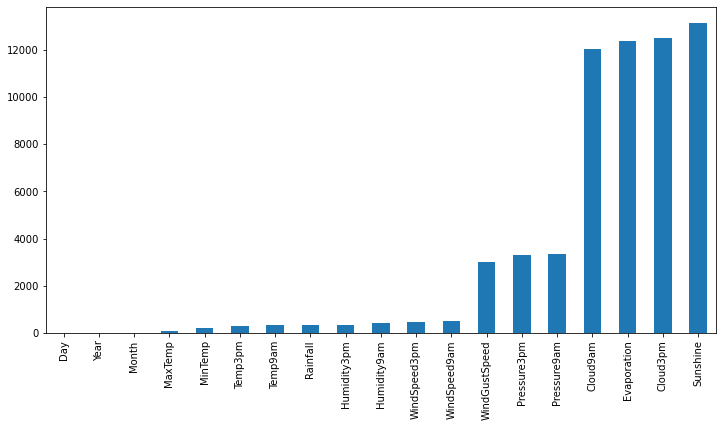

In [50]:
# check missing values in numerical variables
plt.figure(figsize=(12,6))
df[numerical].isnull().sum().sort_values().plot(kind="bar")

In [51]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()))

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  36056.0  36176.0   35912.0      23869.0   23106.0        33246.0   
mean      12.0     23.0       3.0          5.0       8.0           40.0   
std        6.0      7.0       9.0          4.0       4.0           14.0   
min       -8.0     -3.0       0.0          0.0       0.0            7.0   
25%        8.0     18.0       0.0          3.0       5.0           31.0   
50%       12.0     22.0       0.0          5.0       8.0           39.0   
75%       17.0     28.0       1.0          7.0      11.0           48.0   
max       30.0     48.0     371.0         81.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       35755.0       35771.0      35845.0      35903.0      32907.0   
mean           14.0          19.0         69.0         52.0       1017.0   
std             9.0           9.0         18.0         20.0          7.0   
min             0.0 

# Checking box-plot to detect outliers

Text(0, 0.5, 'WindSpeed3pm')

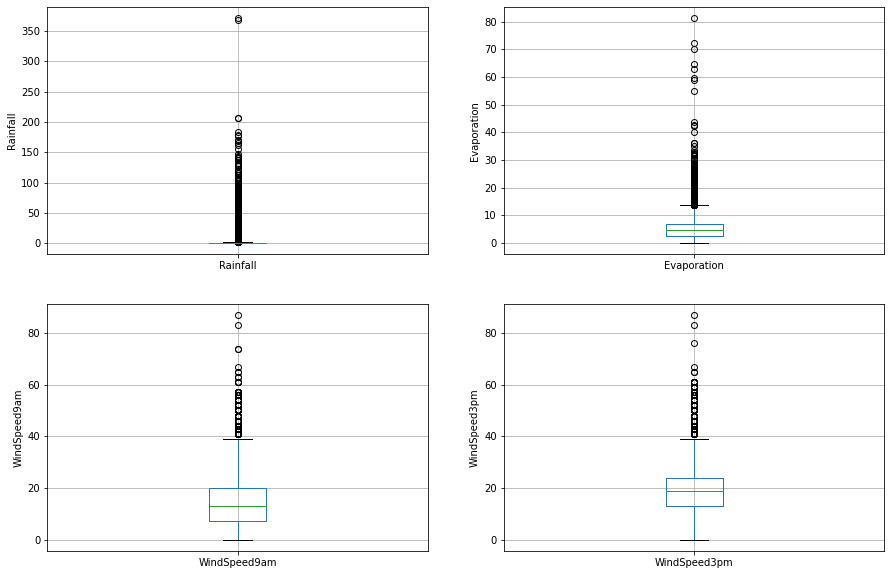

In [52]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'Humidity9am')

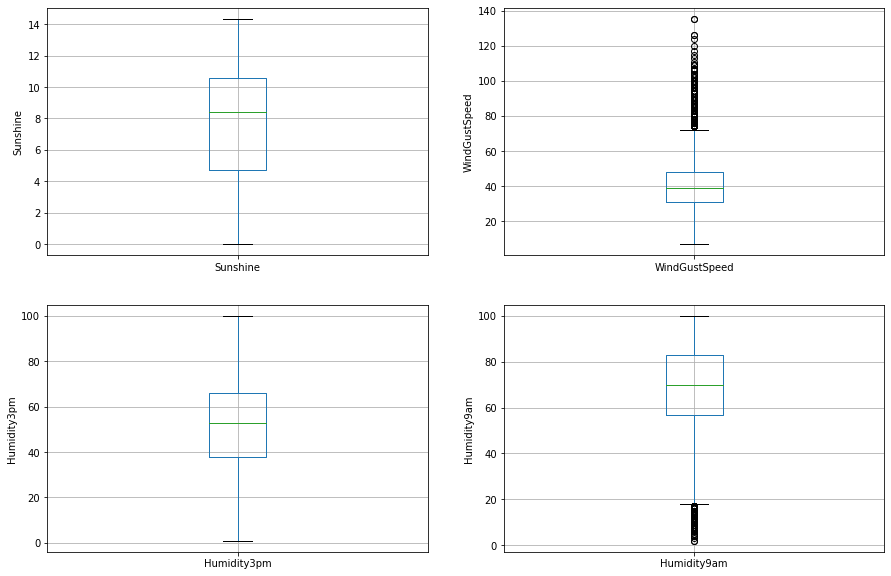

In [53]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Sunshine')
fig.set_title('')
fig.set_ylabel('Sunshine')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Humidity3pm')
fig.set_title('')
fig.set_ylabel('Humidity3pm')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='Humidity9am')
fig.set_title('')
fig.set_ylabel('Humidity9am')

# checking distribution of rainfall,evaporation, windspeed9am and windspeed3pm

Text(0.5, 0, 'WindSpeed3pm')

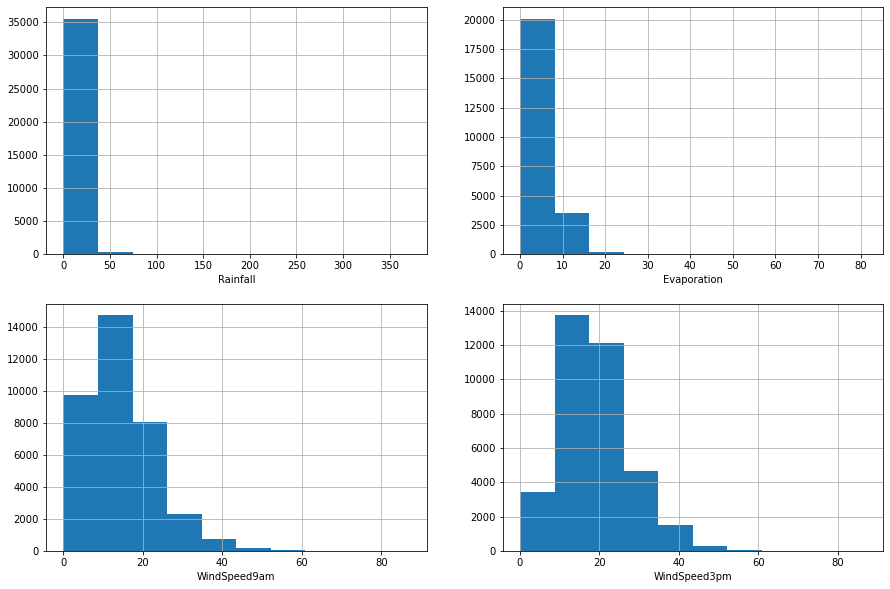

In [54]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')



plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')



plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')



plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')


Text(0.5, 0, 'Humidity9am')

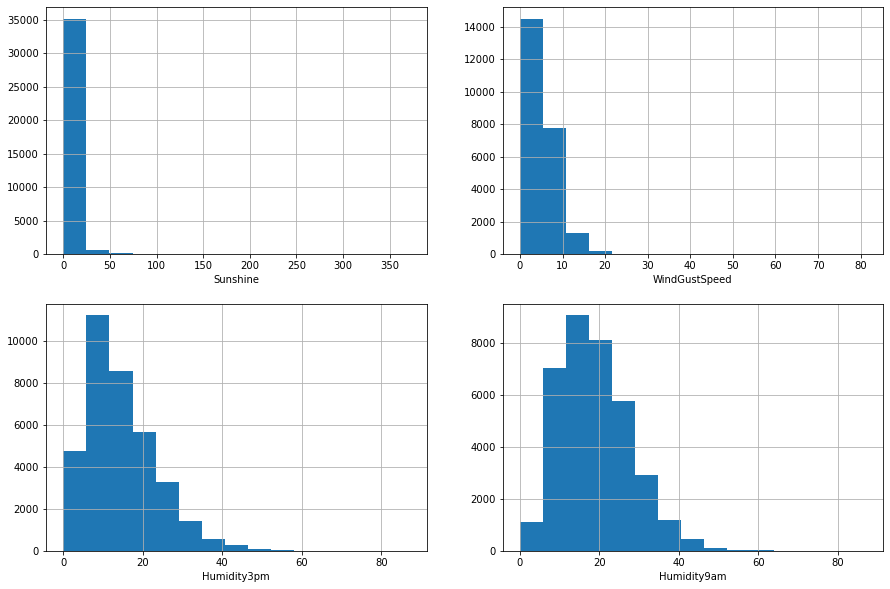

In [55]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=15)
fig.set_xlabel('Sunshine')

plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=15)
fig.set_xlabel('WindGustSpeed')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=15)
fig.set_xlabel('Humidity3pm')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=15)
fig.set_xlabel('Humidity9am')

# detecting Outliers by IQR

In [56]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 1.5)
print(f'Rainfall outliers are values < {Lower_fence} or > {Upper_fence}.')

Rainfall outliers are values < -1.2000000000000002 or > 2.0.


For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 2.0

In [57]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 1.5)
print(f'Evaporation outliers are values < {Lower_fence} or > {Upper_fence}.')

Evaporation outliers are values < -4.0 or > 13.600000000000001.


For Evaporation, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 13.6.

In [58]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print(f'WindSpeed9am outliers are values < {Lower_fence} or > {Upper_fence}.')

WindSpeed9am outliers are values < -12.5 or > 39.5.


For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 59.0.

In [59]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)
print(f'WindSpeed3pm outliers are values < {Lower_fence} or > {Upper_fence}.')

WindSpeed3pm outliers are values < -3.5 or > 40.5.


In [60]:
IQR = df.WindGustSpeed.quantile(0.75) - df.WindGustSpeed.quantile(0.25)
Lower_fence = df.WindGustSpeed.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindGustSpeed.quantile(0.75) + (IQR * 1.5)
print(f'WindGustSpeed outliers are values < {Lower_fence} or > {Upper_fence}.')

WindGustSpeed outliers are values < 5.5 or > 73.5.


In [61]:
IQR = df.Humidity9am.quantile(0.75) - df.Humidity9am.quantile(0.25)
Lower_fence = df.Humidity9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Humidity9am.quantile(0.75) + (IQR * 1.5)
print(f'Humidity9am outliers are values < {Lower_fence} or > {Upper_fence}.')

Humidity9am outliers are values < 18.0 or > 122.0.


In [62]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Split data into separate training and test set

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [64]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((29008, 24), (7253, 24))

In [65]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [66]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [67]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

# Engineering missing values in numerical variables

In [68]:
# check missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

MinTemp            161
MaxTemp             72
Rainfall           271
Evaporation       9944
Sunshine         10603
WindGustSpeed     2436
WindSpeed9am       415
WindSpeed3pm       406
Humidity9am        335
Humidity3pm        293
Pressure9am       2716
Pressure3pm       2696
Cloud9am          9694
Cloud3pm         10075
Temp9am            274
Temp3pm            241
Year                 0
Month                0
Day                  0
dtype: int64

In [69]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            44
MaxTemp            13
Rainfall           78
Evaporation      2448
Sunshine         2552
WindGustSpeed     579
WindSpeed9am       91
WindSpeed3pm       84
Humidity9am        81
Humidity3pm        65
Pressure9am       638
Pressure3pm       632
Cloud9am         2344
Cloud3pm         2442
Temp9am            61
Temp3pm            52
Year                0
Month               0
Day                 0
dtype: int64

In [70]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, ":", round(X_train[col].isnull().mean(),4))

MinTemp : 0.0056
MaxTemp : 0.0025
Rainfall : 0.0093
Evaporation : 0.3428
Sunshine : 0.3655
WindGustSpeed : 0.084
WindSpeed9am : 0.0143
WindSpeed3pm : 0.014
Humidity9am : 0.0115
Humidity3pm : 0.0101
Pressure9am : 0.0936
Pressure3pm : 0.0929
Cloud9am : 0.3342
Cloud3pm : 0.3473
Temp9am : 0.0094
Temp3pm : 0.0083


# Assumption
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

In [71]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [72]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [73]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

# Engineering missing values in categorical variables

In [74]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.084115
WindDir9am     0.072808
WindDir3pm     0.022511
RainToday      0.009342
dtype: float64

In [75]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [76]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [77]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [78]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [79]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

# Engineering outliers in numerical variables

In [80]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 2.0)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 13.6)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 59.0)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 40.5)
    df3['WindGustSpeed']=max_value(df3,'WindGustSpeed',73.5)

In [81]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(2.0, 2.0)

In [82]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(13.6, 13.6)

In [83]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(59.0, 59.0)

In [84]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(40.5, 40.5)

In [85]:
X_train.WindGustSpeed.max(), X_test.WindGustSpeed.max()

(73.5, 73.5)

In [86]:
def min_value(df3, variable, low):
    return np.where(df3[variable]<low, low, df3[variable])

for df3 in [X_train, X_test]:
    df3['Humidity9am'] = min_value(df3, 'Humidity9am', 18.0)

In [87]:
X_train.Humidity9am.min(), X_test.Humidity9am.min()

(18.0, 18.0)

In [88]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,29008.00000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000
mean,12.26442,22.972711,0.503437,4.917885,7.862055,40.043884,14.182295,18.778406,69.165678,52.248311,1017.310149,1014.982963,4.541644,4.636376,16.936100,21.520608,2009.935121,6.565706,15.712562
std,6.35839,6.950590,0.802685,2.638428,3.072715,12.293652,8.898926,8.444441,18.116661,20.283297,6.843869,6.748486,2.348698,2.173440,6.375762,6.774900,0.945874,3.557334,8.798369
min,-8.50000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,18.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.500000,-3.900000,2007.000000,1.000000,1.000000
25%,7.70000,17.800000,0.000000,3.600000,7.000000,31.000000,7.000000,13.000000,58.000000,38.000000,1013.100000,1010.700000,3.000000,3.000000,12.300000,16.500000,2009.000000,3.000000,8.000000
50%,12.10000,22.400000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.400000,1015.000000,5.000000,5.000000,16.600000,20.900000,2010.000000,7.000000,16.000000
75%,17.00000,27.900000,0.800000,5.600000,9.425000,46.000000,19.000000,24.000000,82.000000,66.000000,1021.700000,1019.300000,6.000000,6.000000,21.500000,26.200000,2011.000000,10.000000,23.000000
max,29.70000,48.100000,2.000000,13.600000,14.300000,73.500000,59.000000,40.500000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.600000,46.100000,2012.000000,12.000000,31.000000


# Encode categorical variables

In [89]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [90]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
26313,Ballarat,9.1,19.4,0.0,4.6,8.4,SSE,52.0,SSE,SE,...,1017.6,8.0,5.0,11.6,18.6,0,1,2012,1,14
10041,Sydney,20.5,25.1,0.0,5.2,1.0,SE,39.0,NE,ENE,...,1009.6,7.0,8.0,23.9,23.5,0,1,2010,3,5
10554,Tuggeranong,23.0,34.6,0.0,4.6,8.4,W,54.0,NW,NW,...,1011.8,5.0,5.0,25.2,33.2,0,1,2011,2,2
24265,Sale,12.6,41.2,0.0,7.6,12.5,E,46.0,N,WSW,...,1009.6,0.0,1.0,22.1,40.2,0,1,2009,1,28
9373,NorahHead,9.6,19.5,0.0,4.6,8.4,WNW,26.0,WNW,SW,...,1017.9,5.0,5.0,13.2,18.7,0,1,2009,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21132,BadgerysCreek,12.9,25.8,0.0,4.6,8.4,ESE,28.0,SW,E,...,1015.3,5.0,5.0,18.7,25.3,0,1,2009,2,27
32665,MountGinini,2.3,7.2,0.0,4.6,8.4,ENE,44.0,N,NW,...,1015.0,5.0,5.0,4.1,6.3,0,1,2009,5,25
30929,PerthAirport,8.0,21.8,0.0,2.0,6.3,NW,61.0,N,N,...,1007.2,1.0,7.0,14.2,20.3,0,1,2011,7,27
21632,Hobart,7.6,18.2,2.0,4.6,7.0,NW,57.0,NW,NW,...,1003.1,5.0,5.0,12.2,16.2,1,0,2011,3,2


In [91]:
X_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
9158,Tuggeranong,14.0,29.0,0.0,4.6,8.4,NNE,37.0,ENE,NE,...,1005.2,5.0,5.0,20.7,28.2,0,1,2012,1,29
17064,Mildura,19.6,41.5,0.0,12.0,12.3,SE,26.0,E,E,...,1011.9,1.0,3.0,25.9,40.0,0,1,2009,1,27
30838,Cairns,23.6,33.3,1.8,7.8,8.3,ESE,35.0,SSE,ESE,...,1006.9,5.0,2.0,27.8,32.1,1,0,2010,2,12
3494,Richmond,3.1,9.5,0.0,2.2,8.4,S,17.0,N,SE,...,1017.6,5.0,5.0,5.9,8.8,0,1,2011,7,13
3421,Penrith,18.9,30.4,0.0,4.6,8.4,S,57.0,N,SE,...,1015.0,5.0,5.0,16.6,29.2,0,1,2010,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,Nuriootpa,2.2,18.7,0.2,2.4,9.3,N,28.0,NNE,NNW,...,1022.6,0.0,3.0,11.5,18.4,0,1,2009,8,18
30699,AliceSprings,11.4,19.7,1.2,4.8,10.3,SW,33.0,SW,W,...,1015.9,1.0,0.0,13.2,19.2,1,0,2009,6,6
26032,Wollongong,16.9,23.3,2.0,4.6,8.4,SW,26.0,S,E,...,1028.6,2.0,7.0,18.9,22.0,1,0,2010,3,14
27402,Adelaide,8.2,25.3,0.0,9.2,11.9,WNW,31.0,N,W,...,1017.7,5.0,5.0,14.3,24.4,0,1,2010,10,25


In [92]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0']],
                     pd.get_dummies(X_train.Location,drop_first=True), 
                     pd.get_dummies(X_train.WindGustDir,drop_first=True),
                     pd.get_dummies(X_train.WindDir9am,drop_first=True),
                     pd.get_dummies(X_train.WindDir3pm,drop_first=True)], axis=1)

In [93]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0']],
                     pd.get_dummies(X_test.Location,drop_first=True), 
                     pd.get_dummies(X_test.WindGustDir,drop_first=True),
                     pd.get_dummies(X_test.WindDir9am,drop_first=True),
                     pd.get_dummies(X_test.WindDir3pm,drop_first=True)], axis=1)

In [94]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
9158,14.0,29.0,0.0,4.6,8.4,37.0,9.0,17.0,67.0,40.0,...,0,0,0,0,0,0,0,0,0,0
17064,19.6,41.5,0.0,12.0,12.3,26.0,15.0,11.0,28.0,8.0,...,0,0,0,0,0,0,0,0,0,0
30838,23.6,33.3,1.8,7.8,8.3,35.0,15.0,20.0,76.0,56.0,...,0,0,0,0,0,0,0,0,0,0
3494,3.1,9.5,0.0,2.2,8.4,17.0,0.0,0.0,86.0,76.0,...,0,0,0,1,0,0,0,0,0,0
3421,18.9,30.4,0.0,4.6,8.4,57.0,13.0,13.0,70.0,54.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,2.2,18.7,0.2,2.4,9.3,28.0,7.0,17.0,83.0,45.0,...,1,0,0,0,0,0,0,0,0,0
30699,11.4,19.7,1.2,4.8,10.3,33.0,15.0,24.0,61.0,27.0,...,0,0,0,0,0,0,0,1,0,0
26032,16.9,23.3,2.0,4.6,8.4,26.0,7.0,13.0,85.0,57.0,...,0,0,0,0,0,0,0,0,0,0
27402,8.2,25.3,0.0,9.2,11.9,31.0,0.0,11.0,50.0,20.0,...,0,0,0,0,0,0,0,1,0,0


# Feature Scaling

In [95]:
cols = X_train.columns

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [97]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [98]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [99]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,...,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000
mean,0.543571,0.509233,0.251718,0.361609,0.549794,0.496901,0.240378,0.463664,0.623972,0.517660,...,0.050779,0.059328,0.070119,0.105109,0.063017,0.054330,0.063913,0.066327,0.060397,0.065568
std,0.166450,0.135754,0.401343,0.194002,0.214875,0.184867,0.150829,0.208505,0.220935,0.204882,...,0.219550,0.236242,0.255351,0.306699,0.242998,0.226671,0.244603,0.248856,0.238225,0.247530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.424084,0.408203,0.000000,0.264706,0.489510,0.360902,0.118644,0.320988,0.487805,0.373737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.539267,0.498047,0.000000,0.338235,0.587413,0.481203,0.220339,0.469136,0.634146,0.525253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.667539,0.605469,0.400000,0.411765,0.659091,0.586466,0.322034,0.592593,0.780488,0.656566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model training

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
from sklearn.metrics import roc_auc_score, accuracy_score

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [102]:
y_pred = rf.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8479249965531505

In [104]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5302,  255],
       [ 848,  848]], dtype=int64)

# with hyperparameter tuning

In [105]:
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

In [106]:
clf_rf = GridSearchCV(rf,{'n_estimators':[100,200,300,400]})
clf_rf.fit(X_train,y_train)
print(clf_rf.best_score_)
print(clf_rf.best_params_)

0.8486282987617404
{'n_estimators': 400}


In [107]:
y_pred=clf_rf.predict(X_test)

In [108]:
accuracy_score(y_test,y_pred)

0.8498552323176617